In [61]:
import os
import pandas as pd

In [62]:
cp_path_fjssp = r'C:\Users\huda\Downloads\fjssp\fjssp\results_cplex_cp.txt'
gurobi_path_fjssp = r''
ga_path_fjssp = r''

In [63]:
cp_path_fjssp_w = r'C:\Users\huda\Downloads\results\results_cplex_cp.txt'

In [64]:
def read_file(file : str) -> pd.DataFrame:
    file_content = pd.read_csv(file, names=['name','optimization_status','fitness_value','lower_bound', 'runtime', 'result_vector1', 'result_vector2', 'result_vector3', 'peak_cpu', 'peak_ram', 'resource_history', 'best_result_history'], sep=';')#, converters={'best_result_history': pd.eval})
    df = pd.DataFrame(file_content)
    del file_content
    df = df.drop(columns=['result_vector1', 'result_vector2', 'result_vector3', 'peak_cpu', 'peak_ram'])
    df = df[~df['name'].str.startswith('Error')]
    df = df[df['fitness_value'] != float('inf')]
    return df

In [65]:
cp_fjssp = read_file(cp_path_fjssp)
cp_fjssp_w = read_file(cp_path_fjssp_w)

In [66]:
compare = dict()
compare['worker'] = dict()
compare['no_worker'] = dict()

In [67]:
def remap(name):
    if name.startswith('_'):
        name = name[1:]
    values = name.split('_')
    if values[0].startswith('Behnke'):
        return 'Behnke'+values[-1]
    if values[0].startswith('Brandimarte'):
        return 'BrandimarteMk'+values[-1]
    if values[0].startswith('Chambers'):
        return 'ChambersBarnes'+values[-1]
    if values[0].startswith('Hurink') and values[1].startswith('s'):
        return 'HurinkSdata'+values[-1]
    if values[0].startswith('Hurink') and values[1].startswith('e'):
        return 'HurinkEdata'+values[-1]
    if values[0].startswith('Hurink') and values[1].startswith('r'):
        return 'HurinkRdata'+values[-1]
    if values[0].startswith('Hurink') and values[1].startswith('v'):
        return 'HurinkVdata'+values[-1]
    if values[0].startswith('DP'):
        return 'DPpaulli'+values[-1]
    if values[0].startswith('Kacem'):
        return 'Kacem'+values[-1]
    if values[0].startswith('Fattahi'):
        return 'Fattahi'+values[-1]
    return name

In [68]:
cp_fjssp.head(5)

,name,optimization_status,fitness_value,lower_bound,runtime,resource_history,best_result_history
0,Behnke42,1,87,87,13.837,"[(0, inf, -inf), (0.147, 211, 75), (0.159, 192...",NaN
1,Behnke46,0,116,74,1200.030,"[(0, inf, -inf), (0.188, 298, 73), (0.212, 241...",NaN
2,Behnke60,0,403,84,1200.310,"[(0, inf, -inf), (0.527, 3128, 82), (0.888, 10...",NaN
3,BrandimarteMk12,1,508,508,0.563,"[(0, inf, -inf), (0.084, 733, 156), (0.096, 72...",NaN
4,BrandimarteMk14,1,694,694,0.179,"[(0, inf, -inf), (0.102, 975, 226), (0.116, 95...",NaN


In [69]:
for index, row in cp_fjssp.iterrows():
    compare['no_worker'][row['name']] = {
        'fitness': row['fitness_value'],
        'lower_bound': row['lower_bound'],
        'status': row['optimization_status'],
        'runtime': row['runtime']
    }

In [70]:
for index, row in cp_fjssp_w.iterrows():
    name = remap(row['name'][2:-12])
    if name in compare['no_worker']:
        compare['worker'][name] = {
            'fitness': row['fitness_value'],
            'lower_bound': row['lower_bound'],
            'status': row['optimization_status'],
            'runtime': row['runtime']
        }

In [71]:
for instance in compare['worker']:
    #if compare["no_worker"][instance]["status"] != compare["worker"][instance]["status"]:
    if min(compare["no_worker"][instance]["runtime"], 1200) != min(compare["worker"][instance]["runtime"], 1200):
        print(instance)
        print(f'FJSSP Status: {compare["no_worker"][instance]["status"]} | FJSSP-W Status: {compare["worker"][instance]["status"]}')
        print(f'FJSSP Runtime: {compare["no_worker"][instance]["runtime"]} | FJSSP-W Status: {compare["worker"][instance]["runtime"]}')

Behnke42
FJSSP Status: 1 | FJSSP-W Status: 0.0
FJSSP Runtime: 13.837 | FJSSP-W Status: 1200.23
BrandimarteMk12
FJSSP Status: 1 | FJSSP-W Status: 0.0
FJSSP Runtime: 0.563 | FJSSP-W Status: 1200.12
BrandimarteMk14
FJSSP Status: 1 | FJSSP-W Status: 0.0
FJSSP Runtime: 0.179 | FJSSP-W Status: 1200.26
HurinkSdata1
FJSSP Status: 1 | FJSSP-W Status: 1.0
FJSSP Runtime: 0.054 | FJSSP-W Status: 1.898
HurinkSdata38
FJSSP Status: 1 | FJSSP-W Status: 0.0
FJSSP Runtime: 0.555 | FJSSP-W Status: 1200.19
HurinkSdata40
FJSSP Status: 1 | FJSSP-W Status: 0.0
FJSSP Runtime: 5.845 | FJSSP-W Status: 1200.07
HurinkSdata54
FJSSP Status: 1 | FJSSP-W Status: 0.0
FJSSP Runtime: 3.404 | FJSSP-W Status: 1200.02
HurinkSdata61
FJSSP Status: 1 | FJSSP-W Status: 0.0
FJSSP Runtime: 5.758 | FJSSP-W Status: 1200.01
HurinkSdata63
FJSSP Status: 1 | FJSSP-W Status: 0.0
FJSSP Runtime: 2.833 | FJSSP-W Status: 1200.03
HurinkSdata8
FJSSP Status: 1 | FJSSP-W Status: 1.0
FJSSP Runtime: 0.029 | FJSSP-W Status: 524.572
HurinkEdata1
F

In [72]:
import statistics
import math

def calculate_flexibility(machines_for_all_operations, n_machines): 
    counts = []

    for m in machines_for_all_operations:
        counts.append(len(m))
    
    return statistics.mean(counts) / n_machines

def calculate_duration_variety(durations):
    counts = []

    for d in durations:
        counts.append(len(d))

    return len(set(counts)) / len(counts)

def calculate_average_operations(job_sequence):
    n_jobs = 1
    counts = [1]
    for i in range(1, len(job_sequence)):
        if job_sequence[i] != job_sequence[i-1]:
            n_jobs+=1
            counts.append(0)
        counts[-1] += 1
    return (sum(counts))/n_jobs


In [73]:
def calculate_duration_features_workers(durations):
    all_durations = []
    for duration in durations:
        for d in duration:
            all_durations.extend(d)
    all_durations = [d for d in all_durations if d != 0]
    min_duration = min(all_durations)
    max_duration = max(all_durations)
    span = max_duration - min_duration
    stdev = statistics.stdev(all_durations)
    return min_duration, max_duration, span, stdev

def calculate_duration_features(durations):
    all_durations = []
    for duration in durations:
        all_durations.extend(duration)
    all_durations = [d for d in all_durations if d != 0]
    min_duration = min(all_durations)
    max_duration = max(all_durations)
    span = max_duration - min_duration
    #stdev = statistics.stdev(all_durations)
    mean = sum(all_durations)/len(all_durations)
    var = sum(pow(x-mean, 2) for x in all_durations) / len(all_durations)
    stdev = math.sqrt(var)
    return min_duration, max_duration, span, stdev


In [81]:
from benchmarkrewriter.benchmark_parser import WorkerBenchmarkParser, BenchmarkParser
import os
includeWorkers = False
if includeWorkers:
    path = r'C:\Users\huda\Downloads\benchmarks_with_workers\benchmarks_with_workers'
    parser = WorkerBenchmarkParser()
else:
    path = r'C:\Users\huda\Documents\GitHub\scheduling_model_jrc\code\upgrades\benchmarks\all'
    parser = BenchmarkParser()
instances = os.listdir(path)
instance_data = dict()
consider_duration_features = True
for instance in instances:
    encoding = parser.parse_benchmark(path + "\\" + instance)
    feature_vector = []
    min_d, max_d, d_span, d_stdev = calculate_duration_features(encoding.durations())
    #TODO: worker data, or just do it with base FJSSP since all benchmarks are transformed in the same way
    extracted_data = {
        "name": instance,
        "n_jobs": encoding.n_jobs(), 
        "n_machines": encoding.n_machines(),
        "n_operations": encoding.n_operations(),
        "durations": encoding.durations(),
        "job_sequence": encoding.job_sequence(),
        "machines_for_all_operations": encoding.get_all_machines_for_all_operations() if includeWorkers else encoding.get_machines_for_all_operations(),
        "flexibility": calculate_flexibility(encoding.get_all_machines_for_all_operations() if includeWorkers else encoding.get_machines_for_all_operations(), encoding.n_machines()),
        "duration_variety": calculate_duration_variety(encoding.durations()),
        "average_operations": calculate_average_operations(encoding.job_sequence()),
        "min_duration": min_d,
        "max_duration": max_d,
        "duration_span": d_span,
        "duration_std": d_stdev
    }
    instance_data[instance[:-4]] = extracted_data


In [82]:
instance_data['HurinkEdata24']

{'name': 'HurinkEdata24.fjs',
 'n_jobs': 15,
 'n_machines': 10,
 'n_operations': 150,
 'durations': array([[ 0,  0, 34, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0, 72],
        [ 0,  0,  0, ..., 18,  0,  0],
        [75,  0,  0, ...,  0,  0,  0]]),
 'job_sequence': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  12,
  12,
  12

In [85]:
def print_instance(data):
    print(f"# Operations: {data['n_operations']} | # Machines: {data['n_machines']} | Flexibility: {data['flexibility']} | Duration Variety: {data['duration_variety']}")

In [95]:
diff = []
o = []
m = []
f = []
dv = []
for instance in compare['worker']:
    #if compare["no_worker"][instance]["status"] != compare["worker"][instance]["status"]:
    if min(compare["no_worker"][instance]["runtime"], 1200) != min(compare["worker"][instance]["runtime"], 1200):
        print(instance)
        print_instance(instance_data[instance])
        print(f'FJSSP Status: {compare["no_worker"][instance]["status"]} | FJSSP-W Status: {compare["worker"][instance]["status"]}')
        print(f'FJSSP Runtime: {compare["no_worker"][instance]["runtime"]} | FJSSP-W Status: {compare["worker"][instance]["runtime"]}')
        diff.append(abs(compare["worker"][instance]["runtime"]-compare["no_worker"][instance]["runtime"]))
        o.append(instance_data[instance]['n_operations'])
        m.append(instance_data[instance]['n_machines'])
        f.append(instance_data[instance]['flexibility'])
        dv.append(instance_data[instance]['duration_variety'])


Behnke42
# Operations: 50 | # Machines: 60 | Flexibility: 0.2613333333333333 | Duration Variety: 0.02
FJSSP Status: 1 | FJSSP-W Status: 0.0
FJSSP Runtime: 13.837 | FJSSP-W Status: 1200.23
BrandimarteMk12
# Operations: 193 | # Machines: 10 | Flexibility: 0.14922279792746113 | Duration Variety: 0.0051813471502590676
FJSSP Status: 1 | FJSSP-W Status: 0.0
FJSSP Runtime: 0.563 | FJSSP-W Status: 1200.12
BrandimarteMk14
# Operations: 277 | # Machines: 15 | Flexibility: 0.103971119133574 | Duration Variety: 0.0036101083032490976
FJSSP Status: 1 | FJSSP-W Status: 0.0
FJSSP Runtime: 0.179 | FJSSP-W Status: 1200.26
HurinkSdata1
# Operations: 36 | # Machines: 6 | Flexibility: 0.16666666666666666 | Duration Variety: 0.027777777777777776
FJSSP Status: 1 | FJSSP-W Status: 1.0
FJSSP Runtime: 0.054 | FJSSP-W Status: 1.898
HurinkSdata38
# Operations: 300 | # Machines: 10 | Flexibility: 0.1 | Duration Variety: 0.0033333333333333335
FJSSP Status: 1 | FJSSP-W Status: 0.0
FJSSP Runtime: 0.555 | FJSSP-W Stat

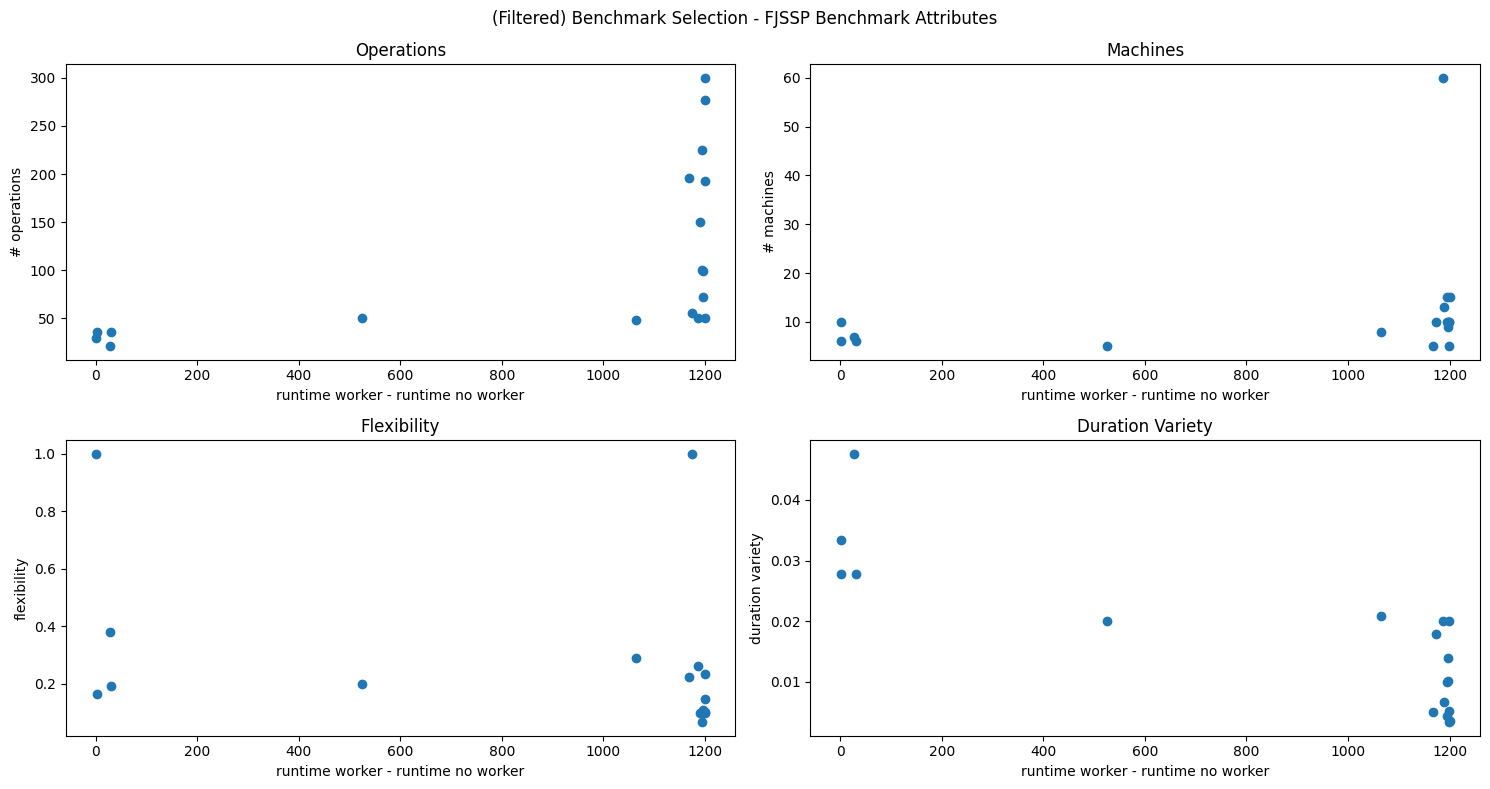

In [102]:
import matplotlib.pyplot as plt
fig = plt.figure(layout='tight', figsize=(15, 8))
axs = fig.subplots(2, 2)
fig.suptitle('(Filtered) Benchmark Selection - FJSSP Benchmark Attributes')
axs[0][0].scatter(diff, o)
axs[0][0].set_title('Operations')
axs[0][0].set_xlabel('runtime worker - runtime no worker')
axs[0][0].set_ylabel('# operations')
axs[0][1].scatter(diff, m)
axs[0][1].set_title('Machines')
axs[0][1].set_xlabel('runtime worker - runtime no worker')
axs[0][1].set_ylabel('# machines')
axs[1][0].scatter(diff, f)
axs[1][0].set_title('Flexibility')
axs[1][0].set_xlabel('runtime worker - runtime no worker')
axs[1][0].set_ylabel('flexibility')
axs[1][1].scatter(diff, dv)
axs[1][1].set_title('Duration Variety')
axs[1][1].set_xlabel('runtime worker - runtime no worker')
axs[1][1].set_ylabel('duration variety')
plt.show()
